Logistic Regression is a method based on classification. 
Linear Regression is converted to logistic Regression using Sigmoid Function.
It a binary classification which has 2 classes i.e., 0 & 1. LR gives the output in between 0 & 1 for any input value. 
0.5 is the cut off value. Below 0.5, it is class 0 and Above 0.5, it is class 1.
After training the logistic model. we need to evaluatethe model which can be done using Confusion Matrix.
Basic Terminologies of confusion Matrix are: TP ( True Positive ), TN ( True Negative ), FP ( False Positive ), FN ( False Negative )
FP & FN are known by Error-I and Error-II respectively.
TP means in Actual, result is Yes and predication is also Yes.
FP means in Actual, result is Yes and predication is No.

# Logistic Regression Part-1

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
train = pd.read_csv('titanic_train.csv')

In [6]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


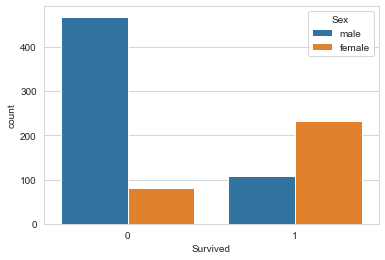

In [9]:
sns.set_style('whitegrid')
sns.countplot('Survived',data = train, hue='Sex')

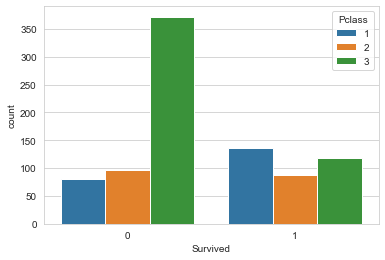

In [10]:
sns.countplot('Survived',data = train, hue='Pclass')

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [13]:
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


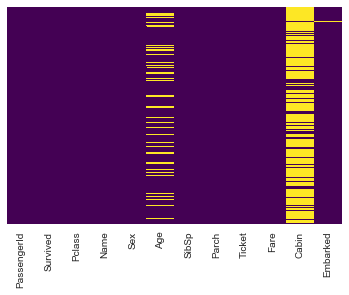

In [18]:
sns.heatmap(train.isnull(), yticklabels = False, cbar=False , cmap = 'viridis')

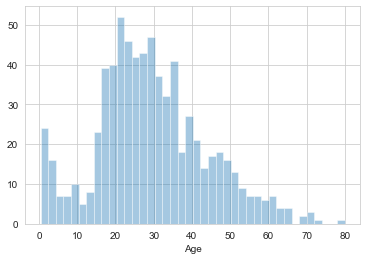

In [21]:
sns.distplot(train['Age'].dropna(), kde=False, bins = 40)                                               # dropna is for dropping NaN Values

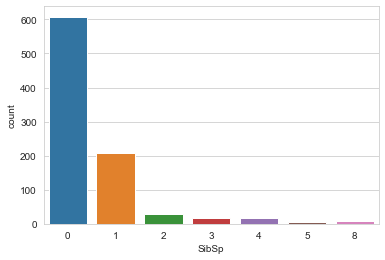

In [22]:
sns.countplot(x='SibSp', data=train)

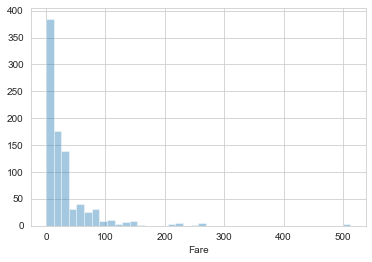

In [25]:
sns.distplot(train['Fare'], bins = 40, kde=False)

In [26]:
import cufflinks as cf

In [29]:
cf.go_offline()

In [32]:
train['Fare'].iplot(kind = 'hist', bins=30)

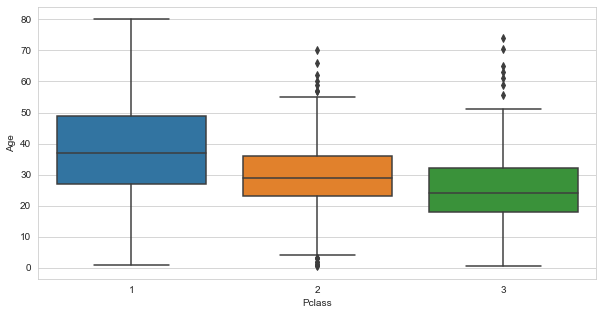

In [37]:
plt.figure(figsize = (10,5))
sns.boxplot(x='Pclass', y='Age', data=train)

In [ ]:
# There are not many NaN values in age column. So we can do just one thing , take the mean of age according to Pclass and Fill that NaN value with a
# mean value corresponding to the Pclass.

In [38]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if (pd.isnull(Age)):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age


In [40]:
train['Age'] = train[['Age','Pclass']].apply(impute_age , axis =1 )

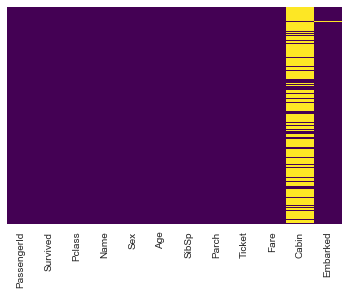

In [44]:
sns.heatmap(train.isnull(), yticklabels = False, cbar=False , cmap = 'viridis')

In [45]:
# Now there are soo many NaN values in cabin column. So we can drop that column.

In [46]:
train.drop('Cabin', axis = 1, inplace = True)

In [48]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


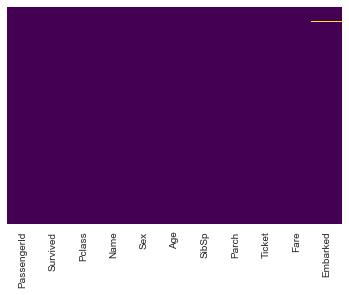

In [49]:
sns.heatmap(train.isnull(), yticklabels = False, cbar=False , cmap = 'viridis')

In [50]:
# Now we have one missing value in Embarked column
# So we can simply drop that missing value.

In [52]:
train.dropna(inplace = True)

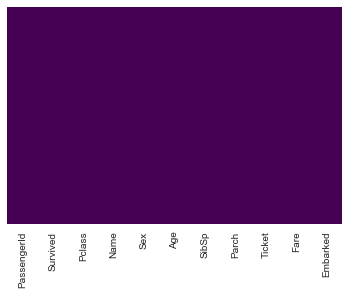

In [53]:
sns.heatmap(train.isnull(), yticklabels = False, cbar=False , cmap = 'viridis')

In [54]:
# Now we have no missing value.

In [55]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [56]:
# Now we have to change the categorical coulmns into machine learning language means in 0 & 1. So that ML Algorithm can be done over it.
# Turning the categorical coumns into 0 & 1 are k/s Dummies.

In [60]:
sex = pd.get_dummies(train['Sex'], drop_first = True)
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [62]:
embark = pd.get_dummies(train['Embarked'], drop_first = True)
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [73]:
train = pd.concat([train, sex,embark], axis = 1)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


In [74]:
# Now the columns Sex , Embarked, Name , Ticket, PassengerId  has no use

In [75]:
train.drop(['Sex' , 'Embarked', 'Name' , 'Ticket', 'PassengerId' ],axis = 1, inplace = True)

In [76]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [77]:
# Now all the data is numeric
# Take a look at Pclass which is also categorical but we are using it as numeric. Why?

# Below train dataset is used as a data

In [81]:
train.columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male', 'Q',
       'S'],
      dtype='object')

In [89]:
x =train[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male', 'Q',
       'S']]
y = train['Survived']

In [85]:
from sklearn.model_selection import train_test_split

In [90]:
x_train,x_test, y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 101)

In [91]:
from sklearn.linear_model import LogisticRegression

In [92]:
logmodel = LogisticRegression()

In [93]:
logmodel.fit(x_train,y_train)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [95]:
predictions = logmodel.predict(x_test)

In [97]:
from sklearn.metrics import classification_report

In [98]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.80      0.91      0.85       163
           1       0.82      0.65      0.73       104

    accuracy                           0.81       267
   macro avg       0.81      0.78      0.79       267
weighted avg       0.81      0.81      0.80       267



In [100]:
from sklearn.metrics import confusion_matrix

In [101]:
confusion_matrix(y_test, predictions)

array([[148,  15],
       [ 36,  68]], dtype=int64)